# kaggle Data Sets

Combining public country statistics from th US Census Bureau with the Human Freedom Index

### United States International Census (Google BigQuery)

* kaggle https://www.kaggle.com/census/census-bureau-international/metadata
* BigQuery https://console.cloud.google.com/bigquery?filter=solution-type:dataset&q=census&id=5d64defd-b1cf-40e6-ae6b-fd3558e15d00&subtask=details&subtaskValue=united-states-census-bureau%2Finternational-census-data&project=bootcamp-1569375678077&folder&organizationId&subtaskIndex=3

### Human Freedom Index (csv)
* kaggle https://www.kaggle.com/gsutters/the-human-freedom-index
* Data Download: https://www.kaggle.com/gsutters/the-human-freedom-index/download
* Background: https://www.cato.org/human-freedom-index-new

Human freedom is "the absence of coercive constraint. It uses 79 distinct indicators of personal and economic freedom in the following areas:
* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business"

ETL Repository https://github.com/Jmaddalena42/ETL_Project

## Obtain Census Dataset

BigQuery Public Datasets https://cloud.google.com/bigquery/public-data/

### Enable Google Cloud services

Google Cloud Python Service Quick Start https://cloud.google.com/bigquery/docs/quickstarts/quickstart-client-libraries#client-libraries-install-python

### Install Dependencies

$ pip install google.cloud

$ pip install --upgrade google-cloud-bigquery

$ pip install --upgrade google-cloud-storage

### Get Service Account API Credentials

Download Service Account Key

https://console.cloud.google.com/apis/credentials?project=bootcamp-1569375678077&folder&organizationId

Enable BigQuery API

https://console.developers.google.com/apis/api/bigquery-json.googleapis.com/overview?project=bootcamp-1569375678077

### Enable Google Credentials for every session

GOOGLE_APPLICATION_CREDENTIALS must be set:

https://console.cloud.google.com/home/dashboard?cloudshell=true&_ga=2.36182944.-145041138.1573320821&pli=1&project=bootcamp-1569375678077&folder&organizationId

### Get Data from BigQuery

kaggle Reference for BigQuery API

https://www.kaggle.com/sohier/beyond-queries-exploring-the-bigquery-api

In [1]:
# Constants

# Google service credentials file
service_account_json = "C:/Users/janin/OneDrive/Documents/GitHub/Bootcamp-7917e2b029b4.json"
# BigQueryPublic data file
PROJECT_ID = 'bigquery-public-data' # All BigQuery public datasets use this project ID
dataset = 'census_bureau_international' # Name of the dataset we're interested in

In [2]:
# Dependencies to be able to get data from Google BigQuery
from google.cloud import bigquery
bigquery_client = bigquery.Client(project=PROJECT_ID)
print(bigquery_client)
from google.cloud import storage
storage_client = storage.Client(project=PROJECT_ID)
print(storage_client)

In [3]:
# Get dataset reference
census_dataset_ref = bigquery_client.dataset(dataset, project=PROJECT_ID)
census_dataset_ref

DatasetReference('bigquery-public-data', 'census_bureau_international')

In [4]:
# Get dataset
census_dset = bigquery_client.get_dataset(census_dataset_ref)
census_dset

Dataset(DatasetReference('bigquery-public-data', 'census_bureau_international'))

To resolve  403 error, enabled BigQuery API at https://console.developers.google.com/apis/library/bigquery-json.googleapis.com?project=bootcamp-1569375678077&pli=1.

Example error:

Forbidden: 403 GET https://bigquery.googleapis.com/bigquery/v2/projects/bigquery-public-data/datasets/census_bureau_international: BigQuery API has not been used in project 488912422205 before or it is disabled. Enable it by visiting https://console.developers.google.com/apis/api/bigquery-json.googleapis.com/overview?project=488912422205 then retry. If you enabled this API recently, wait a few minutes for the action to propagate to our systems and retry.

In [5]:
# List tables in the dataset
print("Tables:")
tables = []
for table in bigquery_client.list_tables(census_dset):
    table_id = table.table_id
    if len(table_id)>0:
        tables.append(table_id)
        print(table_id)

Tables:
age_specific_fertility_rates
birth_death_growth_rates
country_names_area
midyear_population
midyear_population_5yr_age_sex
midyear_population_age_sex
midyear_population_agespecific
mortality_life_expectancy


In [6]:
# Limit tables and get commands
desired_tables  = ['birth_death_growth_rates',
                  'country_names_area',
                  'midyear_population',
                  'mortality_life_expectancy']
print('Tables:')
census_tables = []
for table in desired_tables:
    census_table = bigquery_client.get_table(census_dset.table(table))
    print(census_table.table_id)
    census_tables.append(census_table)
print()
print("Table Commands:")
census_commands = [command for command in dir(census_tables[0]) if not command.startswith('_')]
print(census_commands)
print()
print("Schema Commands:")
schema_commands = [command for command in dir(census_tables[0].schema[0]) if not command.startswith('_')]
print(schema_commands)

Tables:
birth_death_growth_rates
country_names_area
midyear_population
mortality_life_expectancy

Table Commands:
['clustering_fields', 'created', 'dataset_id', 'description', 'encryption_configuration', 'etag', 'expires', 'external_data_configuration', 'friendly_name', 'from_api_repr', 'from_string', 'full_table_id', 'labels', 'location', 'modified', 'num_bytes', 'num_rows', 'partition_expiration', 'partitioning_type', 'path', 'project', 'reference', 'require_partition_filter', 'schema', 'self_link', 'streaming_buffer', 'table_id', 'table_type', 'time_partitioning', 'to_api_repr', 'to_bqstorage', 'view_query', 'view_use_legacy_sql']

Schema Commands:
['description', 'field_type', 'fields', 'from_api_repr', 'is_nullable', 'mode', 'name', 'to_api_repr', 'to_standard_sql']


In [7]:
# Get Table Schemas
print('Schemas')
for census_table in census_tables:
    print()
    print('__________________________________________________________________________________________________')
    print(f"Table: {census_table.table_id}")
    print('__________________________________________________________________________________________________')
    for schema_field in census_table.schema:
        print(f"{schema_field.name} {schema_field.field_type} {schema_field.description}")        

Schemas

__________________________________________________________________________________________________
Table: birth_death_growth_rates
__________________________________________________________________________________________________
country_code STRING Federal Information Processing Standard (FIPS) country/area code
country_name STRING Country or area name
year INTEGER Year
crude_birth_rate FLOAT Crude birth rate (births per 1,000 population)
crude_death_rate FLOAT Crude death rate (deaths per 1,000 population)
net_migration FLOAT Net migration rate (net number of migrants per 1,000 population)
rate_natural_increase FLOAT Rate of natural increase (percent)
growth_rate FLOAT Growth rate (percent)

__________________________________________________________________________________________________
Table: country_names_area
__________________________________________________________________________________________________
country_code STRING Federal Information Processing Standard (FIP

In [87]:
# Get data for 2008 to 2016
table_ids = []
countries = []
years = []
columns = []
results = []
for census_table in census_tables:
    schema_cols = [col for col in census_table.schema]
    table_id = census_table.table_id
    for row in bigquery_client.list_rows(census_table, start_index=100, selected_fields=schema_cols):
        row_values = dict(row)
        if "year" in row_values.keys():
            year = row_values["year"]
            country = row_values["country_name"]
            if year>=2008 and year<=2016:
                for col in schema_cols:
                    column = col.name
                    if (column!="year") and (column!="country_name"):
                        table_ids.append(table_id)
                        countries.append(country)
                        years.append(year)
                        columns.append(column)
                        result = row[column]
                        results.append(result)

In [121]:
# Add lists to DataFrame
import pandas as pd
# create DataFrame and add data lists to it
censusdf = pd.DataFrame()
censusdf["table"] = table_ids
censusdf["country"] = countries
censusdf["year"] = years
censusdf["column"] = columns
censusdf["value"] = results
# Save raw census data
censusdf.to_csv("Census_Raw_Data.csv")

In [122]:
# Remove extra country label and table name
censusdf = censusdf.loc[censusdf['column']!='country_code']
censusdf = censusdf.drop(columns=['table'])
# Set index
censusdf.set_index(['country','year','column'],inplace=True)
# Enable groupby
censusdf['value'] = censusdf['value'].astype(float)
# groupby to remove missing values
censusdf = censusdf.groupby(['country','year','column']).mean()
# unstack to pivot columns 
censusdf = censusdf.unstack()
# rename to flatten column names
censusdf = censusdf.value.rename_axis([None], axis=1).reset_index()
censusdf

,country,year,crude_birth_rate,crude_death_rate,growth_rate,infant_mortality,infant_mortality_female,infant_mortality_male,life_expectancy,life_expectancy_female,life_expectancy_male,midyear_population,mortality_rate_1to4,mortality_rate_1to4_female,mortality_rate_1to4_male,mortality_rate_under5,mortality_rate_under5_female,mortality_rate_under5_male,net_migration,rate_natural_increase
0,Afghanistan,2008,40.30,15.64,3.269,130.52,121.80,138.83,48.19,49.41,47.03,27705724.0,72.78,73.89,71.70,193.80,186.69,200.58,8.03,2.466
1,Afghanistan,2009,40.05,15.34,2.282,128.34,119.73,136.54,48.56,49.81,47.38,28483631.0,71.03,72.06,70.03,190.25,183.16,197.01,-1.90,2.471
2,Afghanistan,2010,39.77,15.09,2.143,126.19,117.69,134.29,48.93,50.20,47.72,29120727.0,69.32,70.28,68.38,186.76,179.70,193.49,-3.25,2.468
3,Afghanistan,2011,39.53,14.84,2.183,123.89,115.51,131.88,49.33,50.63,48.09,29757566.0,67.50,68.37,66.65,183.02,175.98,189.74,-2.87,2.469
4,Afghanistan,2012,39.30,14.59,2.220,121.63,113.36,129.51,49.72,51.05,48.45,30419928.0,65.73,66.53,64.95,179.37,172.35,186.05,-2.51,2.471
5,Afghanistan,2013,39.05,14.35,2.254,119.41,111.25,127.18,50.11,51.47,48.81,31108077.0,64.00,64.73,63.30,175.77,168.78,182.43,-2.16,2.470
6,Afghanistan,2014,38.84,14.12,2.289,117.23,109.18,124.89,50.49,51.88,49.17,31822848.0,62.32,62.98,61.68,172.24,165.28,178.87,-1.83,2.472
7,Afghanistan,2015,38.57,13.89,2.317,115.08,107.15,122.64,50.87,52.29,49.52,32564342.0,60.67,61.25,60.11,168.77,161.84,175.38,-1.51,2.468
8,Afghanistan,2016,38.28,13.65,2.343,112.84,105.01,120.29,51.28,52.72,49.90,33332025.0,58.97,59.48,58.47,165.15,158.24,171.73,-1.20,2.463
9,Albania,2008,11.37,5.29,-0.152,13.12,11.94,14.17,77.93,80.68,75.50,2984121.0,2.31,2.26,2.36,15.40,14.17,16.50,-7.60,0.608


In [124]:
# Output reshaped census data
censusdf.to_csv("Census_reshaped.csv")

# Human Freedom Index

In [44]:
# File to Load (Remember to Change These)
freedom_index_csv = "freedom.csv"
freedom_df = pd.read_csv(freedom_index_csv)
# Limit columns
freedom_df = freedom_df[['year',
                         'countries',
                         'pf_rol_civil',
                         'pf_rol_criminal',
                         'pf_ss_homicide',
                         'pf_ss_disappearances_disap',
                         'pf_movement_women',
                         'pf_movement',
                         'pf_religion',
                         'pf_association_political',
                         'pf_expression_killed',
                         'pf_expression_jailed',
                         'pf_expression_influence',
                         'pf_expression',
                         'pf_identity_sex', 
                         'pf_identity_divorce',
                         'ef_legal_protection',
                         'ef_legal_military',
                         'ef_trade_movement',
                         'ef_regulation_credit_ownership']].copy()
# Rename HFI columns for readability
freedom_df = freedom_df.rename(columns={"pf_rol_civil": "Civil justice", "pf_rol_criminal": "Criminal justice", 'pf_ss_homicide': 'Homicide', 'pf_ss_disappearances_disap': 'Disappearances', 'pf_movement_women': 'Womens movement', 'pf_movement': 'Freedom of movement', 'pf_religion': 'Religious freedom', 'pf_association_political': 'Freedom to establish and operate political parties', 'pf_expression_killed': 'Press killed', 'pf_expression_jailed': 'Press jailed', 'pf_expression_influence': 'regulations influence media', 'pf_expression': 'Freedom of expression', 'pf_identity_sex': 'Same-sex ralitionships', 'pf_identity_divorce': 'Divorce', 'ef_legal_protection': 'Protection of property', 'ef_legal_military': 'Military interference in law',
                   'ef_trade_movement': 'Control over movement of people and goods', 'ef_regulation_credit_ownership': 'Ownership of Banks'})
# Reset Index and sort
freedom_df.set_index('year', inplace=True)
freedom_df = freedom_df.sort_values(by =['countries', 'year']).reset_index()
freedom_df

,year,countries,Civil justice,Criminal justice,Homicide,Disappearances,Womens movement,Freedom of movement,Religious freedom,Freedom to establish and operate political parties,Press killed,Press jailed,regulations influence media,Freedom of expression,Same-sex ralitionships,Divorce,Protection of property,Military interference in law,Control over movement of people and goods,Ownership of Banks
0,2008,Albania,5.074785,4.100516,8.756539,10.0,10.0,10.000000,9.195000,NaN,10.000000,10.000000,4.666667,7.666667,10.0,NaN,3.717371,8.333333,2.109925,5.0
1,2009,Albania,5.074785,4.100516,8.852373,10.0,10.0,10.000000,9.791667,NaN,10.000000,10.000000,4.666667,7.666667,10.0,NaN,3.913393,8.333333,3.624133,5.0
2,2010,Albania,5.074785,4.100516,8.272417,10.0,10.0,10.000000,9.416667,NaN,10.000000,10.000000,4.666667,7.604167,10.0,NaN,4.046221,8.333333,3.675338,5.0
3,2011,Albania,5.074785,4.100516,8.059220,10.0,5.0,6.666667,9.135185,8.750000,10.000000,10.000000,4.666667,8.595238,10.0,NaN,3.561092,8.333333,3.423734,5.0
4,2012,Albania,4.900000,3.600000,7.849344,10.0,5.0,6.666667,9.305556,8.750000,10.000000,10.000000,5.000000,8.678571,10.0,NaN,3.075611,8.333333,3.216676,5.0
5,2013,Albania,4.900000,3.600000,8.300775,10.0,5.0,6.666667,9.114444,8.750000,10.000000,10.000000,5.000000,8.678571,10.0,5.0,2.955938,8.333333,5.897336,5.0
6,2014,Albania,5.041787,4.302964,8.397686,10.0,5.0,6.666667,9.855185,10.000000,10.000000,10.000000,5.000000,8.678571,10.0,5.0,3.413995,8.333333,6.208105,5.0
7,2015,Albania,4.802975,4.583263,9.096927,10.0,5.0,6.666667,9.235185,10.000000,10.000000,10.000000,5.000000,8.642857,10.0,5.0,4.228487,8.333333,6.155187,5.0
8,2016,Albania,4.547244,4.666508,8.920429,10.0,5.0,6.666667,9.192593,10.000000,10.000000,10.000000,5.000000,8.607143,10.0,5.0,4.512228,8.333333,6.406138,5.0
9,2008,Algeria,NaN,NaN,9.623645,10.0,5.0,5.000000,4.354074,4.166667,10.000000,10.000000,2.666667,6.702381,0.0,NaN,3.536542,5.000000,1.350171,0.0


# Postgres DB

Upload transformed data to Postgres DB as tables for joining and further manipulation.

In [118]:
# Dependencies for DB
from sqlalchemy import create_engine
from sqlalchemy import inspect
from sqlalchemy import MetaData
from sqlalchemy import Table
from sqlalchemy import Column
from databaseconfig import password

In [119]:
# Import CSVs to Postgres
connection_string = f"postgres:{password}@localhost:5432/ETL_Project"
engine = create_engine(f'postgresql://{connection_string}')
freedom_df.to_sql('hfi', con=engine)
censusdf.to_sql('census', con=engine)
engine.table_names()

['hfi', 'census']

# Changes in Postgres DB

If uppercase names are inserted, they are inserted with quotes areoung the table and field names.  Use alter to rename if needed, for example:

    ALTER TABLE "HFI" RENAME TO hfi;

    ALTER TABLE "Census" RENAME TO census;

Dropped Index on census to avoid duplication with hfi.

Created view happiness_join to join hfi and census:

    SELECT 
        c.country, 
        c.year, 
        h."Civil justice", 
        h."Criminal justice", 
        h."Religious freedom", 
        h."Freedom of expression", 
        h."Disappearances",
        h."Womens movement",
        h."Freedom of movement", 
        h."Freedom to establish and operate political parties", 
        h."Press killed", 
        h."Press jailed", 
        c.growth_rate, 
        c.infant_mortality,
        c.life_expectancy,
        c.midyear_population,
        c.net_migration
    FROM census as c LEFT JOIN hfi as h on c.year = h.year AND c.country = h.countries
    WHERE h.year IS NOT NULL
    ORDER BY 
        c.country,
        c.year
    ;

# Read Data

In [147]:
joindf = pd.read_sql_query('SELECT * FROM happiness_join',con=engine)
joindf.head()

,year,Civil justice,Criminal justice,Religious freedom,Freedom of expression,Disappearances,Womens movement,Freedom of movement,Freedom to establish and operate political parties,Press killed,Press jailed,growth_rate,infant_mortality,life_expectancy,midyear_population,net_migration
count,1332.000000,846.000000,846.000000,1260.000000,1260.000000,1251.000000,1216.000000,1260.000000,1074.000000,1260.000000,1260.000000,1320.000000,1326.000000,1326.000000,1.332000e+03,1320.000000
mean,2012.000000,5.486370,5.058943,7.882207,7.865754,8.437250,8.137336,7.942460,6.887415,9.235904,9.656084,1.325489,25.680113,71.212836,4.517998e+07,0.600492
std,2.582959,1.440229,1.726975,1.309659,1.487764,3.139404,2.996028,2.540575,3.105036,2.344707,1.377223,1.743915,23.474291,8.503802,1.520798e+08,14.425922
min,2008.000000,0.000000,0.000000,3.214815,0.208333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.775000,1.580000,29.470000,8.659500e+04,-148.870000
25%,2010.000000,4.550319,3.801097,7.161019,6.999644,10.000000,5.000000,6.666667,5.000000,10.000000,10.000000,0.430750,6.170000,64.912500,3.607028e+06,-2.020000
50%,2012.000000,5.323103,4.595614,8.163889,8.170891,10.000000,10.000000,8.333333,7.500000,10.000000,10.000000,1.180500,15.840000,73.610000,1.004420e+07,-0.240000
75%,2014.000000,6.391731,6.389486,8.857130,9.084917,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.160500,41.825000,77.425000,3.075599e+07,1.552500
max,2016.000000,8.773533,8.719848,10.000000,9.797619,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,28.496000,98.820000,85.000000,1.373541e+09,274.530000


# Analysis of Joined Data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


Plotted Countries:
['Barbados', 'Belize', 'Canada', 'Costa Rica', 'El Salvador', 'Guatemala', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Trinidad and Tobago', 'United States', 'Haiti']

Years:
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016]



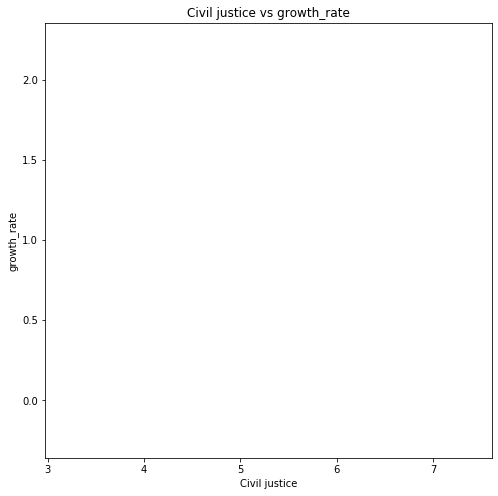

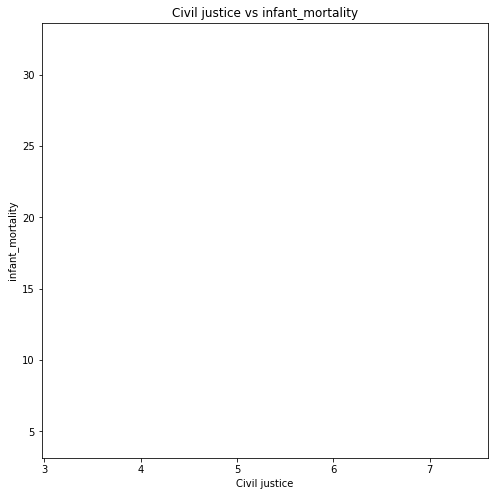

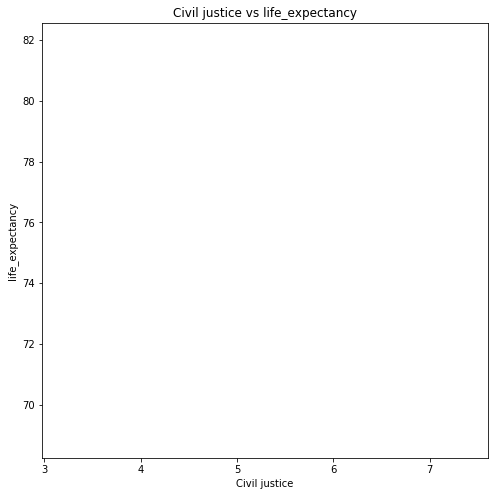

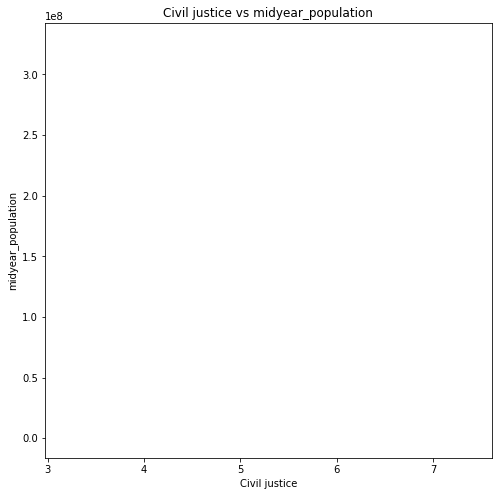

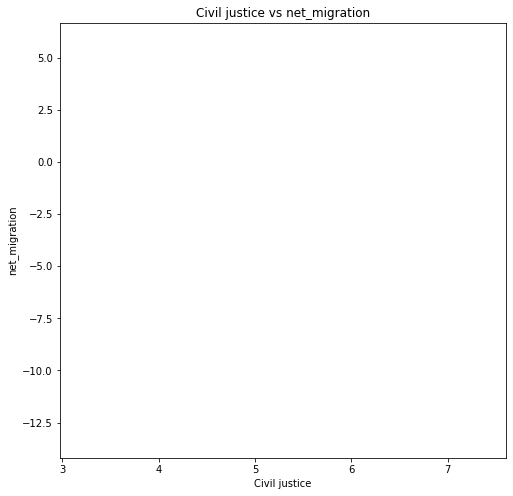

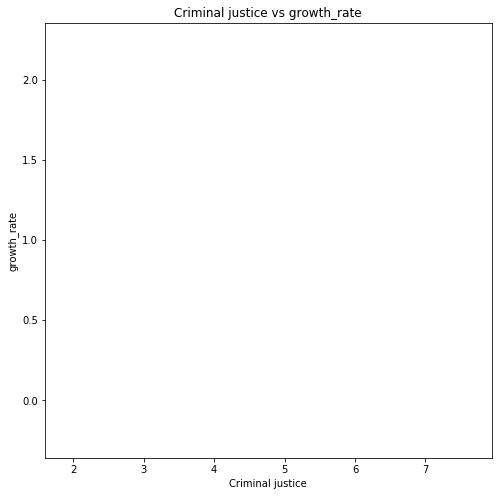

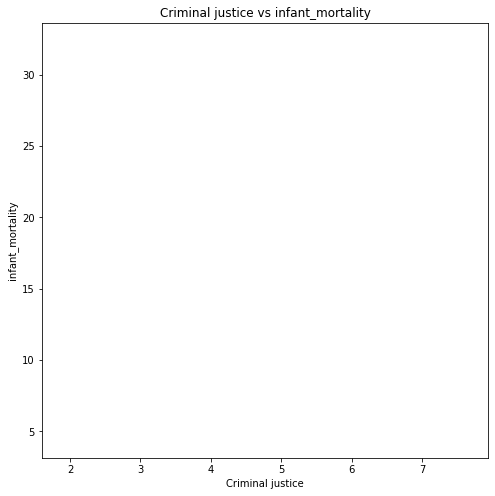

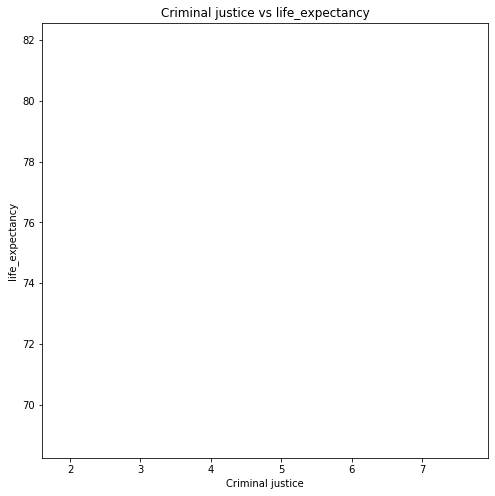

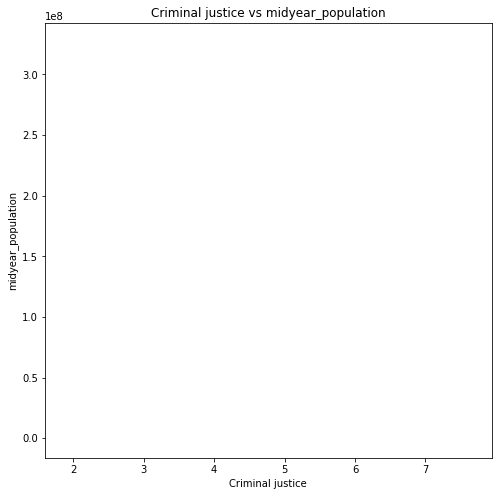

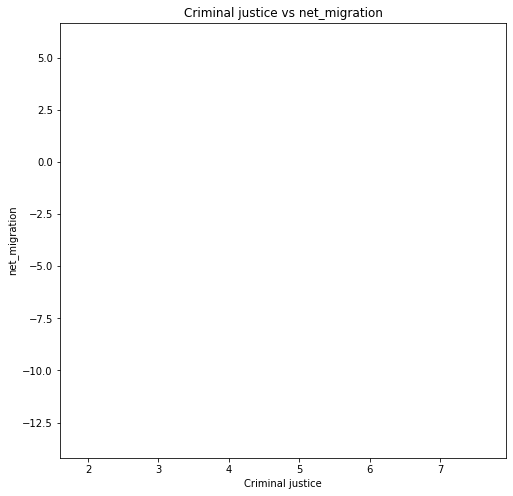

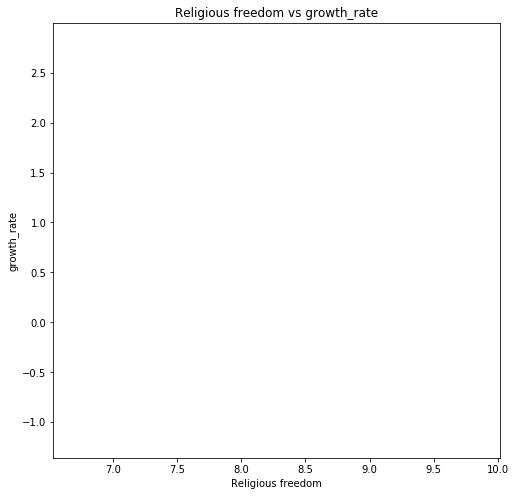

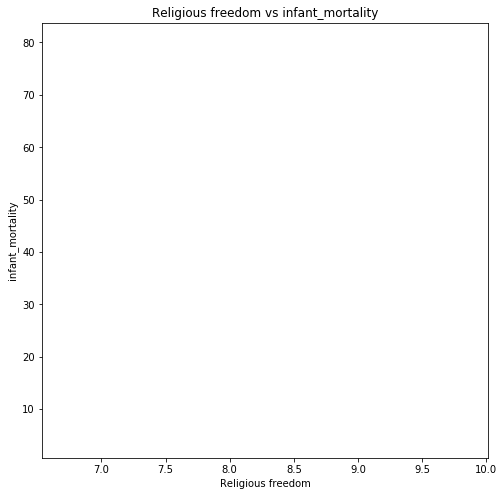

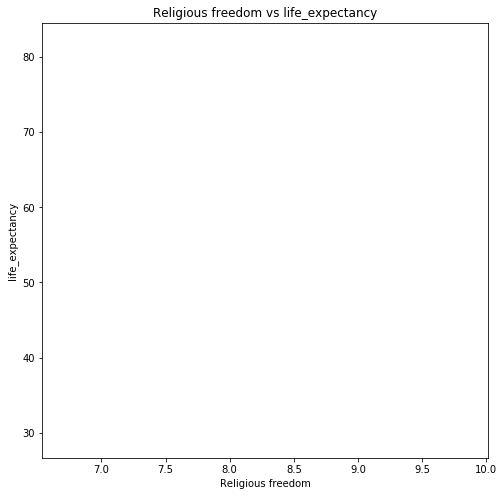

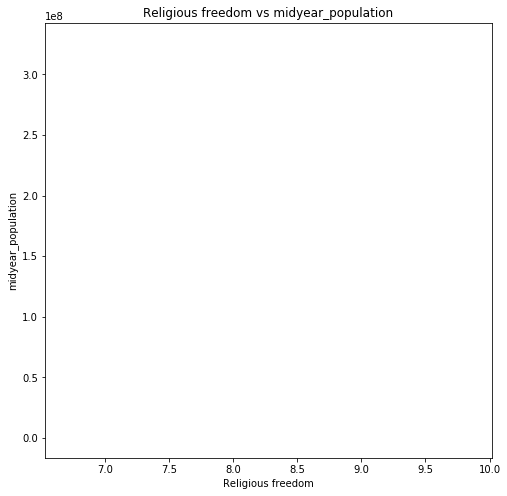

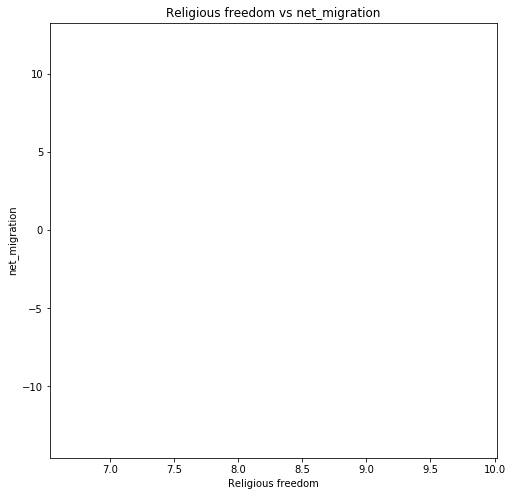

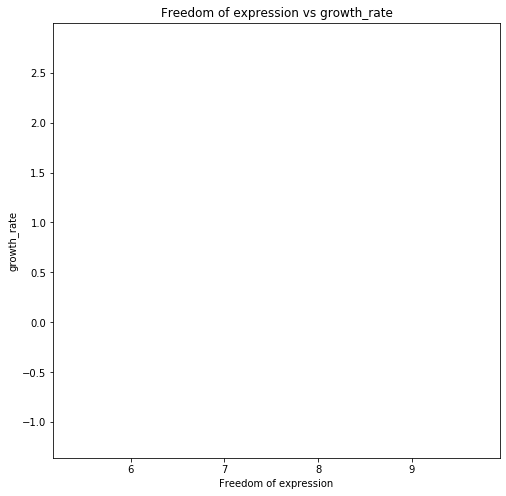

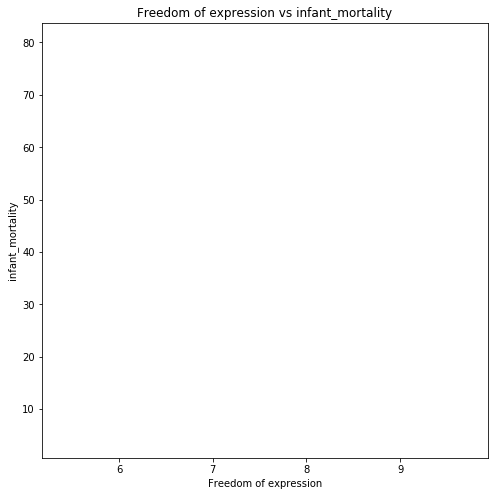

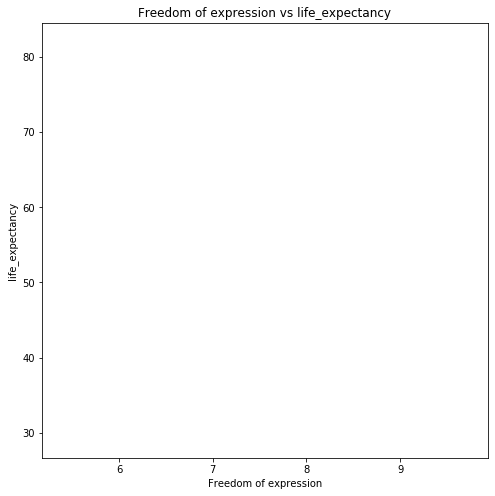

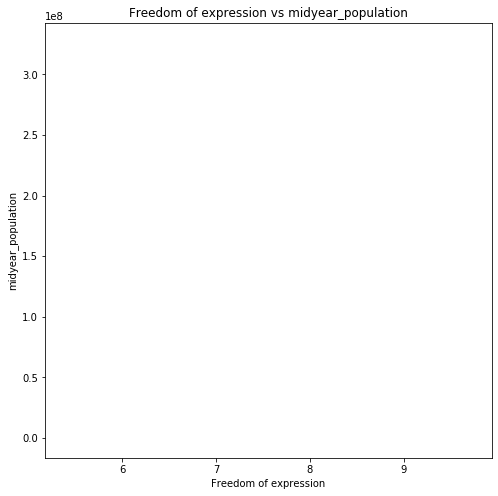

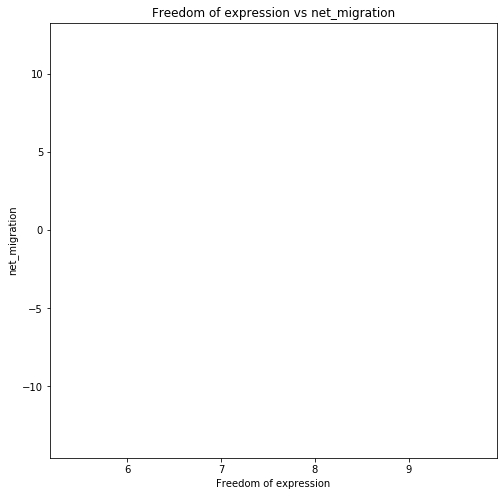

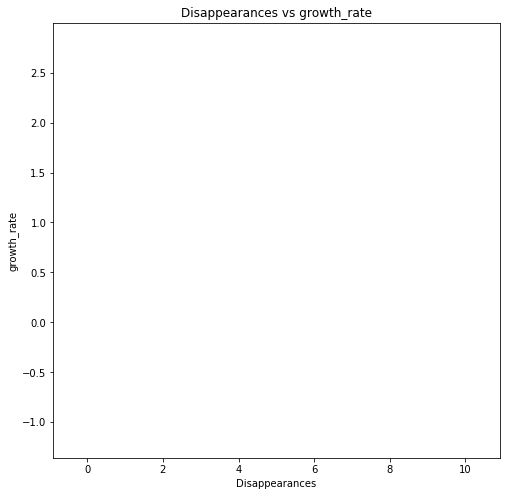

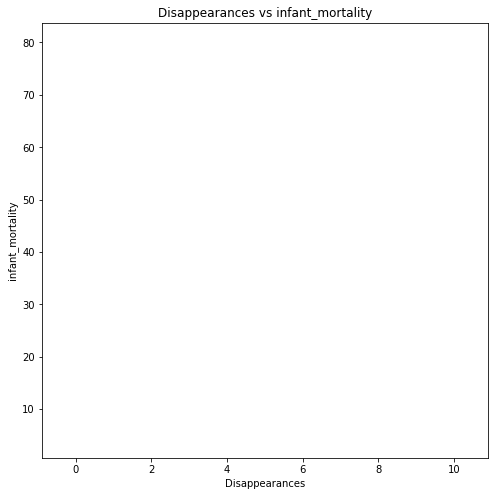

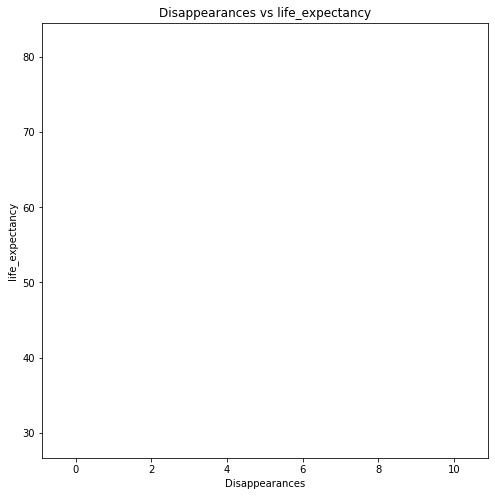

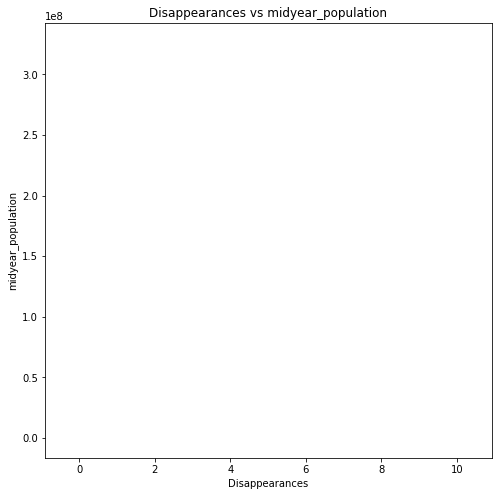

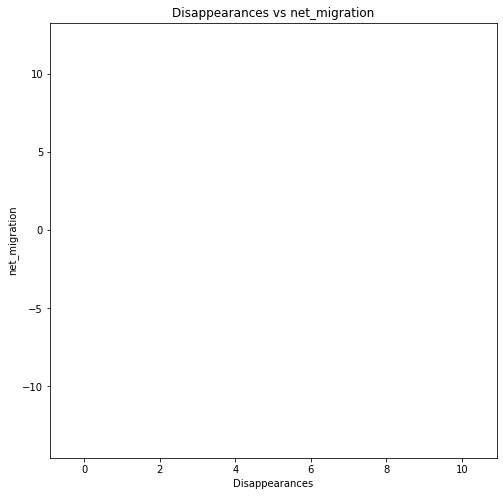

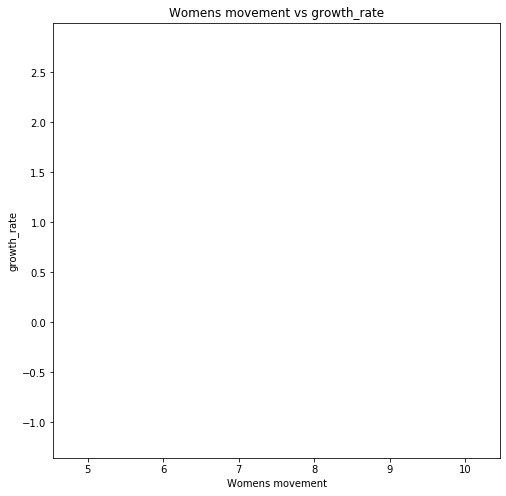

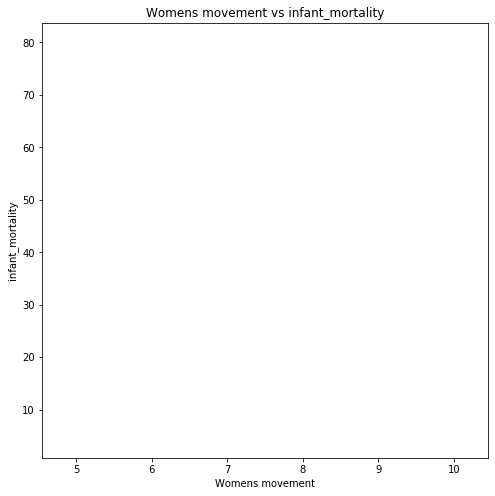

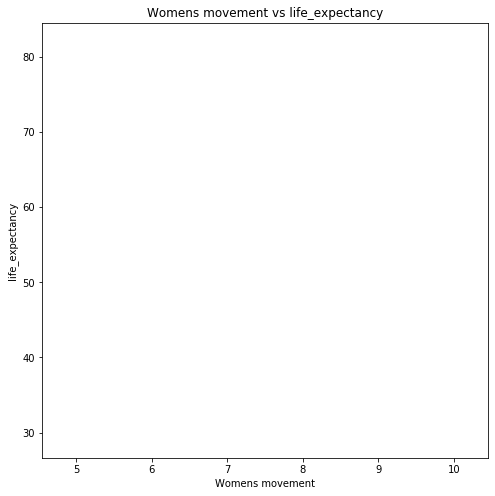

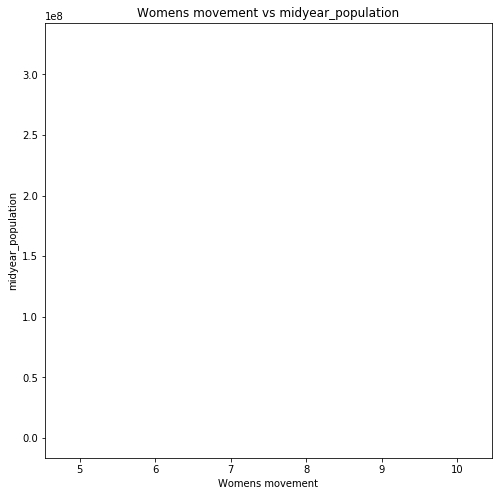

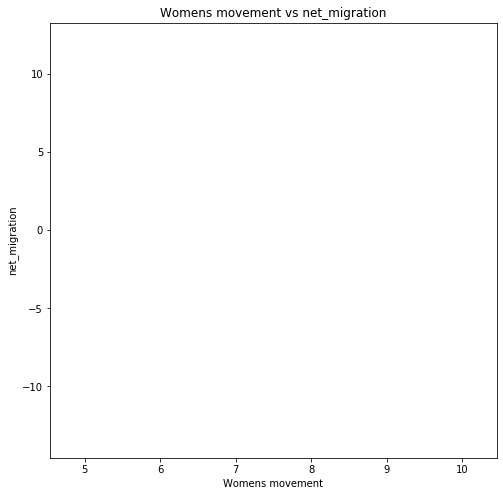

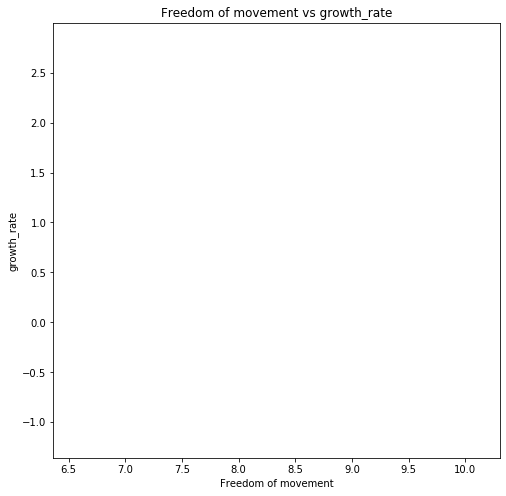

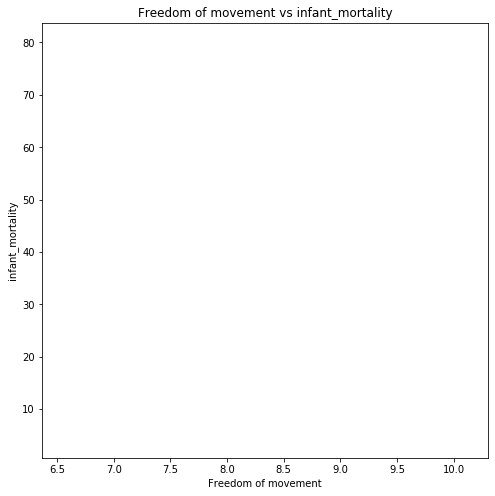

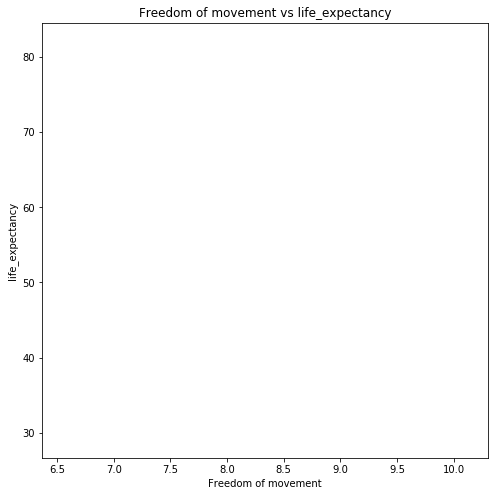

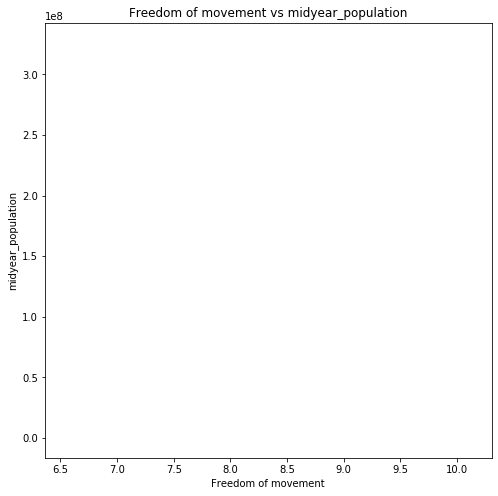

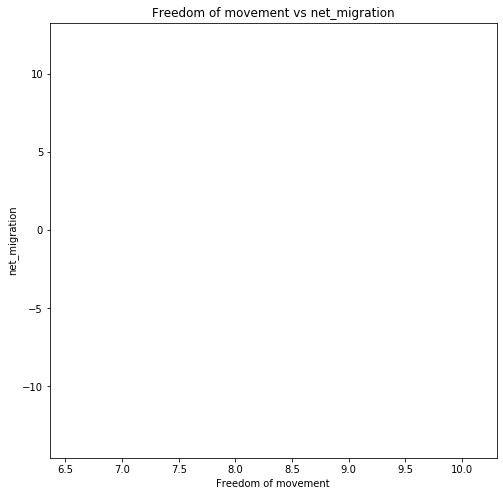

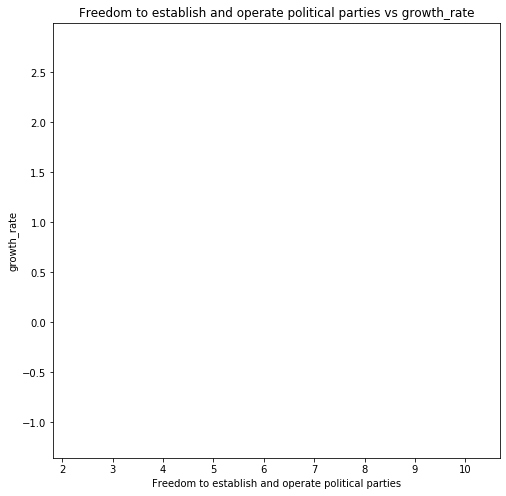

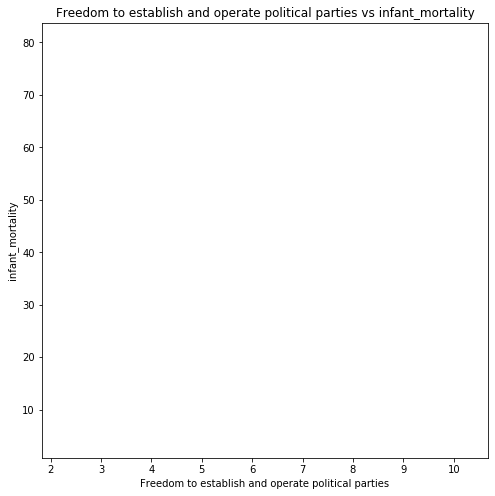

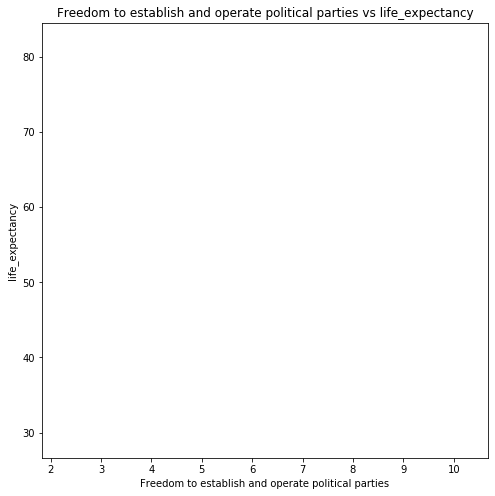

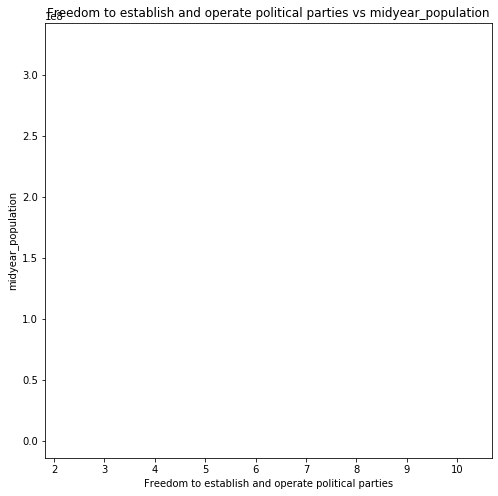

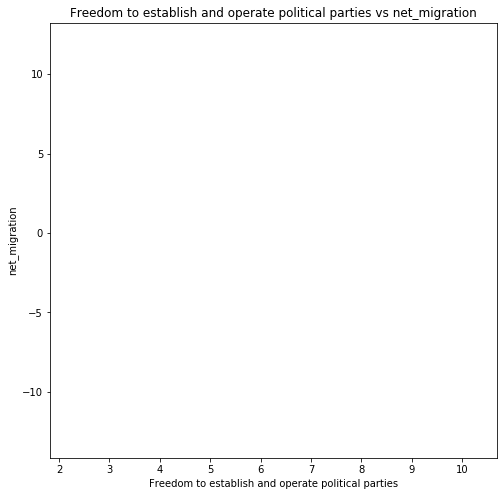

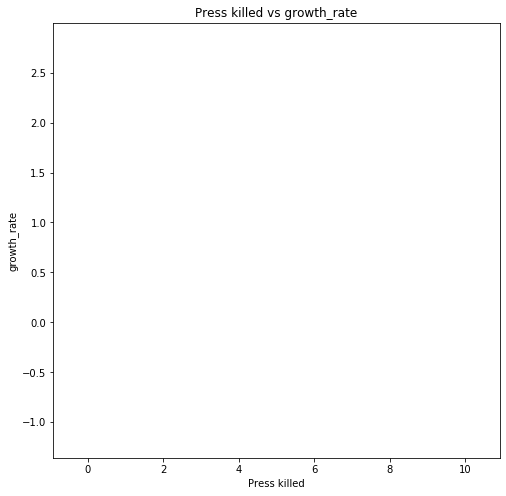

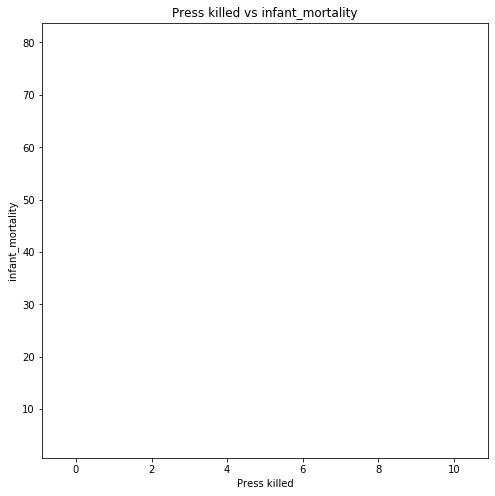

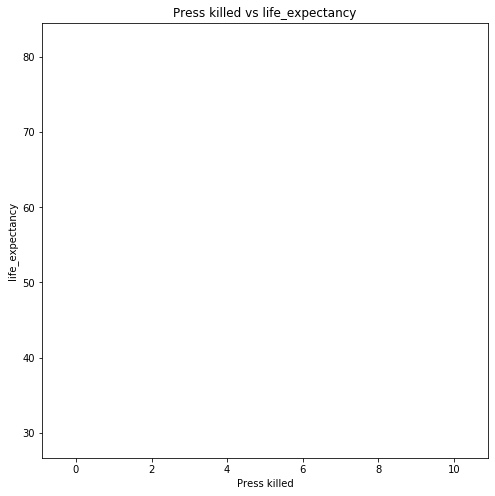

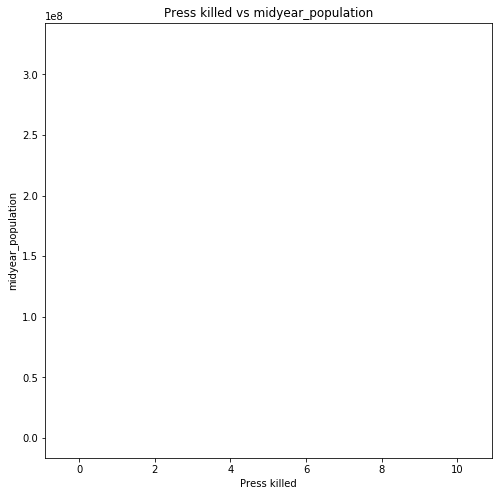

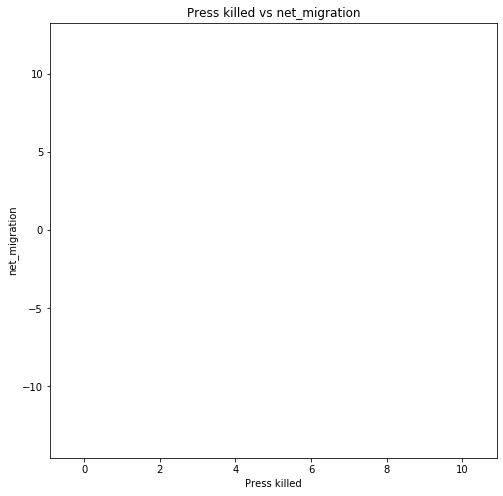

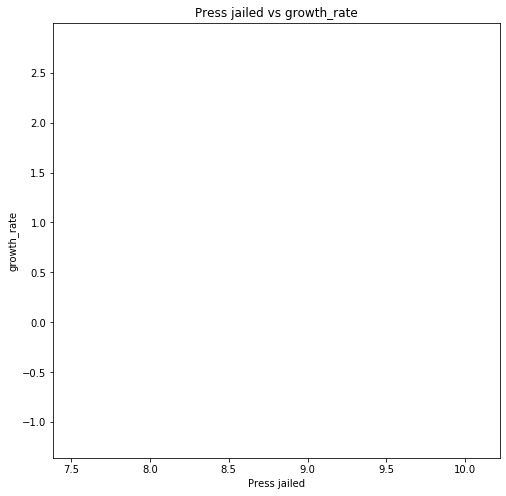

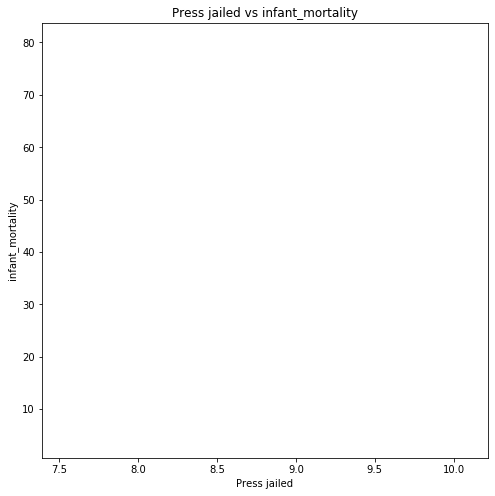

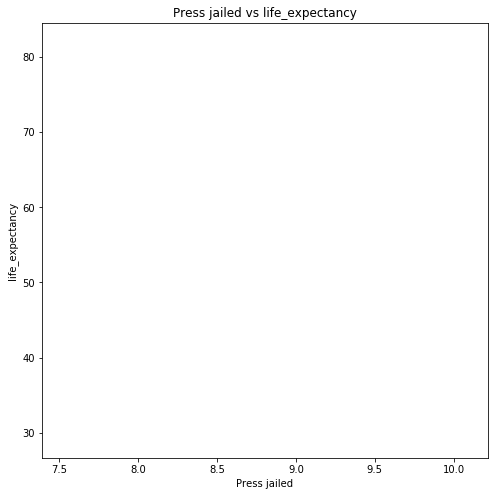

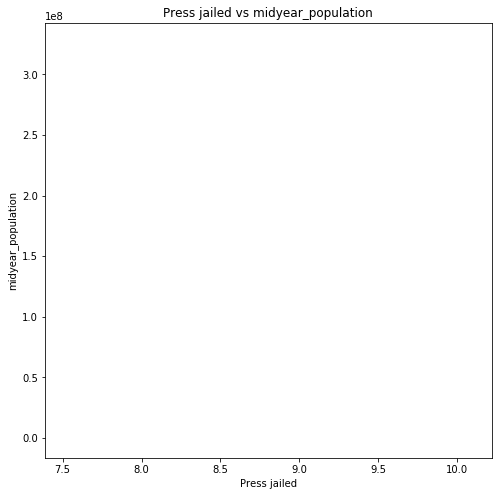

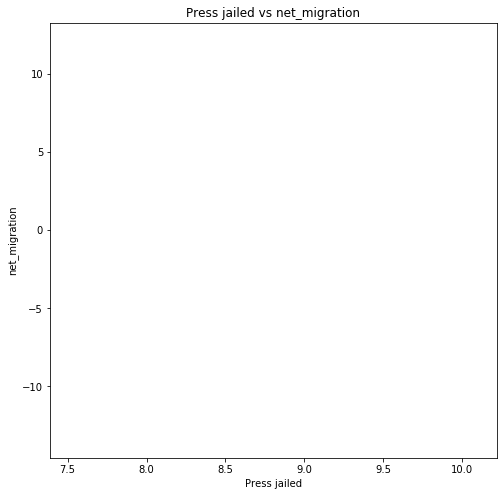

In [208]:
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

markers = [".",",","o","v","^","<",">","1","2","3","4","8","s","p","P","*","h","H","+","x","X","D","d","|","_"]
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']

freedom_columns = ['Civil justice',
                     'Criminal justice',
                     'Religious freedom',
                     'Freedom of expression',
                     'Disappearances',
                     'Womens movement',
                     'Freedom of movement',
                     'Freedom to establish and operate political parties',
                     'Press killed',
                     'Press jailed']

census_columns = ['growth_rate',
                  'infant_mortality',
                  'life_expectancy',
                  'midyear_population',
                  'net_migration']

countries = joindf["country"].unique().tolist()

North_American_countries = [\
                            'Antigua and Barbuda',
                            'Bahamas',
                            'Barbados',
                            'Belize',
                            'Canada',
                            'Costa Rica',
                            'Cuba',
                            'Dominica',
                            'Dominican Repulic',
                            'El Salvador',
                            'Grenada',
                            'Guatemala',
                            'Haiti',
                            'Honduras',
                            'Jamaica',
                            'Mexico',
                            'Nicaragua',
                            'Panama',
                            'Saint Kitts and Nevis',
                            'Saint Lucia',
                            'Saint Vincent and the Grenadines',
                            'Trinidad and Tobago',
                            'United States']


plotted_countries = []
for freedom in freedom_columns:
    for census in census_columns:
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111)
        plot_title = f"{freedom} vs {census}"
        for country in available_countries:
            countrydf = joindf.loc[joindf["country"]==country]
            countrydf = countrydf.drop(columns=["country"])
            for year in range(2008,2017):
                country_code = f"${country[0:4]}{str(year-2000)}$"
                plotdf = countrydf.loc[countrydf[freedom].notnull(),["year",freedom,census]].copy()
                plotdf = plotdf.loc[plotdf[census].notnull(),["year",freedom,census]].copy()
                plotdf["year"] = plotdf["year"].astype(int)
                plotdf = plotdf.loc[plotdf["year"]==year,[freedom,census]].copy()
                col_len = len(plotdf)
                if col_len>0:
                    plotdf[freedom] = plotdf[freedom].astype(float)
                    plotdf[census] = plotdf[census].astype(float)
                    plotdf.plot.scatter(x=freedom,y=census,s=800,marker=country_code,ax=ax)
                    if country not in plotted_countries:
                        plotted_countries.append(country)
        ax.set_title(plot_title)
        ax.set_xlabel(freedom)
        ax.set_ylabel(census)

print("Plotted Countries:")
print(plotted_countries)
print()

years = joindf["year"].unique().tolist()
print("Years:")
print(years)
print()